<a href="https://colab.research.google.com/github/LIONPANJSHIR/ML/blob/main/04California_houssing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Module

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
    with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

df = load_housing_data()

In [3]:
# ## mettre les variables en francais
# df.columns ['longitude', 'latitude', 'age_median_maison ', 'pieces_total',
#        'chambres_total', 'population', 'households', 'median_income',
#        'median_house_value', 'ocean_proximity']

In [4]:
df.head(10).style.set_sticky(axis="index")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.isnull().sum().sort_values(ascending=False)

total_bedrooms        207
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Statistiques descriptives

In [8]:
df.describe().T

count           mean            std         min  \
longitude           20640.0    -119.569704       2.003532   -124.3500   
latitude            20640.0      35.631861       2.135952     32.5400   
housing_median_age  20640.0      28.639486      12.585558      1.0000   
total_rooms         20640.0    2635.763081    2181.615252      2.0000   
total_bedrooms      20433.0     537.870553     421.385070      1.0000   
population          20640.0    1425.476744    1132.462122      3.0000   
households          20640.0     499.539680     382.329753      1.0000   
median_income       20640.0       3.870671       1.899822      0.4999   
median_house_value  20640.0  206855.816909  115395.615874  14999.0000   

                            25%          50%           75%          max  
longitude             -121.8000    -118.4900    -118.01000    -114.3100  
latitude                33.9300      34.2600      37.71000      41.9500  
housing_median_age      18.0000      29.0000      37.00000      52.0000  
total_rooms           1447.7500    2127.0000    3148.00000   39320.0000  
total_bedrooms         296.0000     435.0000     647.00000    6445.0000  
population             787.0000    1166.0000    1725.00000   35682.0000  
households             280.0000     409.0000     605.00000    6082.0000  
median_income            2.5634       3.5348       4.74325      15.0001  
median_house_value  119600.0000  179700.0000  264725.00000  500001.0000

Cette base de donn√©e contient au total 20.640 observations
* La variable `housing_median_age` contient 207 valeurs **manquantes**
* Toutes les variables sont num√©rique sauf la variable `ocean_proximity` qui est une variable cat√©gorielle
* Les variables num√©riques (hors variable de positions ) sont fortement asym√©trique (longue traine a droite , skewness positive) comme nous pouvons l'observ√© sur la **figure 1.1**
* Une grande variances des variables sont observ√©s aussi

In [9]:
df['ocean_proximity'].value_counts().to_frame().style.background_gradient(cmap='Blues')

La variable `ocean_proximity` est une variable cat√©gorielle qui indique la proximit√© de chaque logement par rapport √† l'oc√©an. Le comptage des valeurs montre la distribution des logements dans les diff√©rentes cat√©gories :

- **<1H OCEAN :** La cat√©gorie la plus fr√©quente avec 9136 logements.
- **INLAND :** La deuxi√®me cat√©gorie la plus fr√©quente avec 6551 logements.
- **NEAR OCEAN :** Repr√©sente 2658 logements.
- **NEAR BAY :** Repr√©sente 2290 logements.
- **ISLAND :** La cat√©gorie la moins fr√©quente avec seulement 5 logements.

Cette distribution indique que la majorit√© des logements se trouvent soit √† moins d'une heure de l'oc√©an, soit √† l'int√©rieur des terres. La cat√©gorie 'ISLAND' √©tant tr√®s peu repr√©sent√©e pourrait n√©cessiter une attention particuli√®re lors de l'analyse ou de la mod√©lisation.

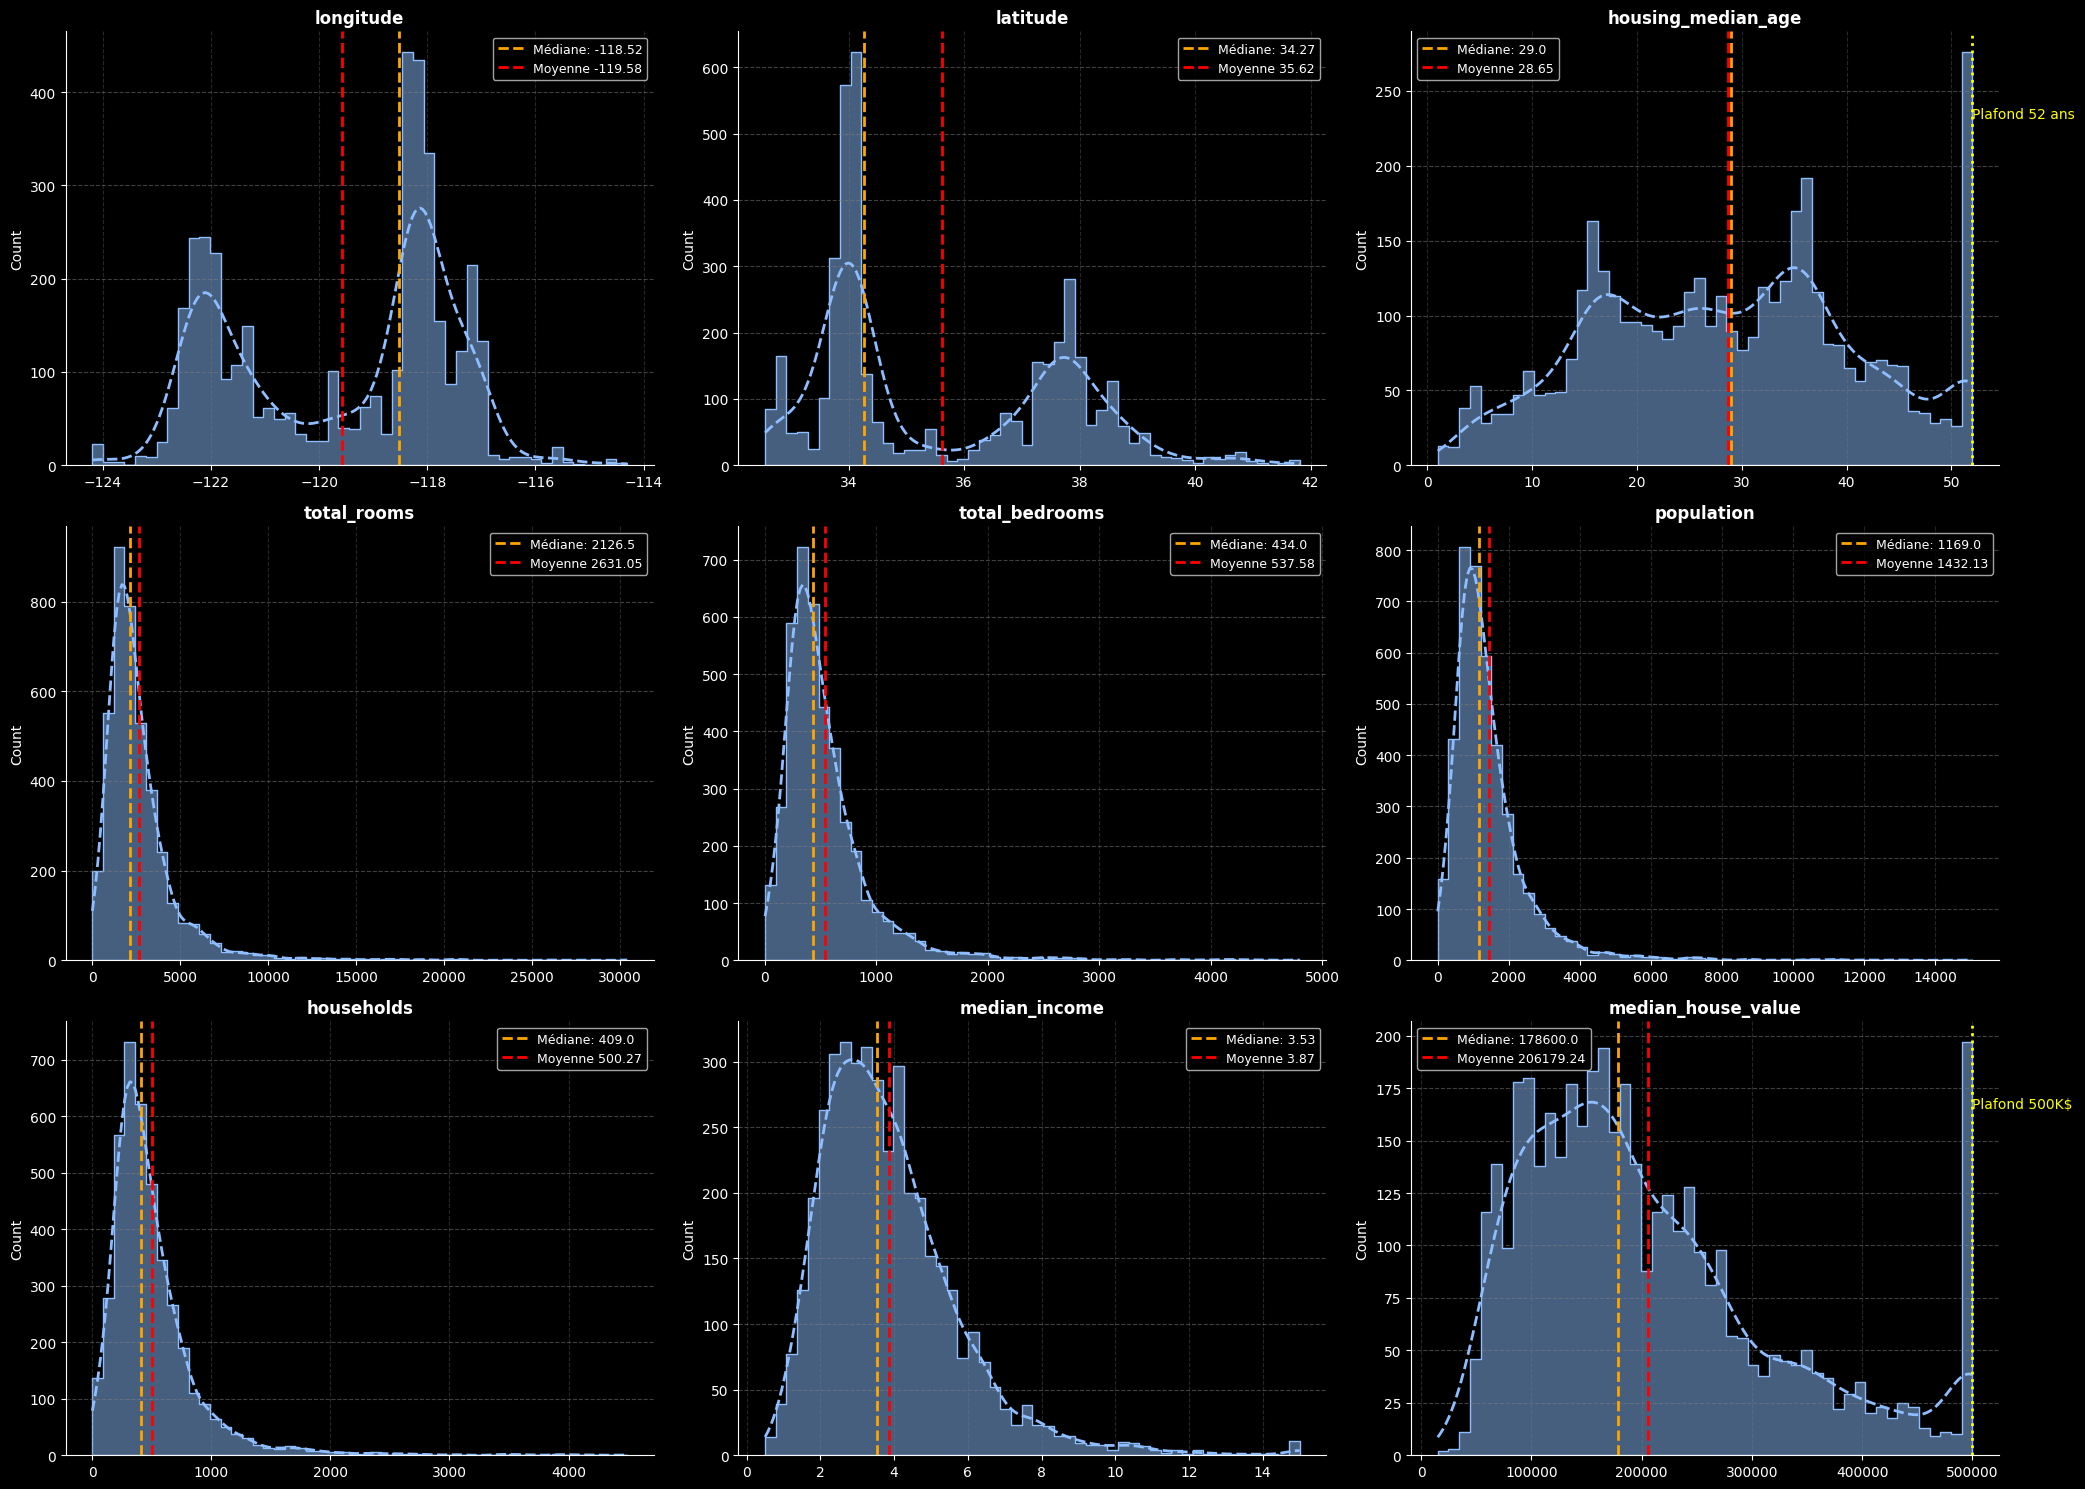

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("dark_background")
# sns.reset_defaults()

# Number of rows and columns for subplots
rows = len(df.select_dtypes(include='number').columns) // 3
cols = 3

fig, axes = plt.subplots(rows, cols, figsize=(21, 15))
axes = axes.flatten()  # flatten to 1D array pour facilier les iterations


for i, col in enumerate(df.select_dtypes(include='number').columns):
    sns.histplot(df[col], ax=axes[i], kde=True, color="#8EBEFF",bins=50 , line_kws={"linewidth": 2, "linestyle": "--"},element='step')
    median = np.round(df[col].median(),2)
    mean = np.round(df[col].mean(),2)
    axes[i].axvline(median, color='orange', linestyle='--', linewidth=2, label=f'M√©diane: {median}')
    axes[i].axvline(mean, color='red', linestyle='--', linewidth=2, label=f'Moyenne {mean}')
    axes[i].legend()
    axes[i].set_title(col, fontsize=12, fontweight="bold")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")
    for spines_vals ,spines in axes[i].spines.items():
      if spines_vals in ['top', 'right']:
          spines.set_visible(False)
    axes[i].xaxis.grid(ls="--" , alpha=0.3 , color ="gray")
    axes[i].yaxis.grid(ls="--" , alpha=0.5, color ="gray")
  # Annotation sp√©ciale pour les variables plafonn√©es
    if col == "median_house_value":
        axes[i].axvline(500000, color="yellow", linestyle=":", linewidth=2)
        axes[i].text(500000, axes[i].get_ylim()[1]*0.8, "Plafond 500K$", color="yellow")

    if col == "housing_median_age":
        axes[i].axvline(52, color="yellow", linestyle=":", linewidth=2)
        axes[i].text(52, axes[i].get_ylim()[1]*0.8, "Plafond 52 ans", color="yellow")

    axes[i].legend(fontsize=9)

# # Hide unused subplots if any
# for j in range(i + 1, len(axes)):
#     fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [11]:
# df['housing_median_age'][df['housing_median_age'] > 50]


* **Les variables ne sont pas toutes sur la m√™me √©chelle.**
  Certaines sont exprim√©es en milliers, d‚Äôautres en dizaines ou centaines de milliers, ce qui peut compliquer la comparaison directe des distributions.

* **`median_income` a √©t√© normalis√©e** : une unit√© correspond √† environ **10 000 \$ de revenu m√©dian**.
 Cela permet de travailler sur une variable continue plus compacte, mais il faut garder cette √©chelle en t√™te pour l‚Äôinterpr√©tation.

* **Certaines variables pr√©sentent un effet de plafonnement :**

  * `median_house_value` est limit√© √† **500 000 \$**, ce qui traduit une **censure** des maisons les plus ch√®res. Les prix sup√©rieurs ne sont pas visibles, ce qui masque le segment haut de gamme du march√©.
  * `housing_median_age` est limit√© √† **52 ans**, ce qui regroupe toutes les maisons plus anciennes dans une seule cat√©gorie. Cela **efface la diversit√©** du parc immobilier ancien (par exemple entre des maisons de 60 ans et des b√¢timents historiques de 100 ans).



In [12]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# plt.style.use("dark_background")
# # sns.reset_defaults()

# # Number of rows and columns for subplots
# rows = len(df.select_dtypes(include='number').columns) // 3
# cols = 3

# fig, axes = plt.subplots(rows, cols, figsize=(21, 15))
# axes = axes.flatten()  # flatten to 1D array pour facilier les iterations


# for i, col in enumerate(df.select_dtypes(include='number').columns):
#     sns.boxplot(df[col], ax=axes[i])
#     axes[i].set_title(col, fontsize=12, fontweight="bold")
#     axes[i].set_xlabel("")
#     axes[i].set_ylabel("Count")
#     for spines_vals ,spines in axes[i].spines.items():
#       if spines_vals in ['top', 'right']:
#           spines.set_visible(False)
#     axes[i].xaxis.grid(ls="--" , alpha=0.3 , color ="gray")
#     axes[i].yaxis.grid(ls="--" , alpha=0.5, color ="gray")
#   # Annotation sp√©ciale pour les variables plafonn√©es
#     if col == "median_house_value":
#         axes[i].axvline(500000, color="yellow", linestyle=":", linewidth=2)
#         axes[i].text(500000, axes[i].get_ylim()[1]*0.8, "Plafond 500K$", color="yellow")

#     if col == "housing_median_age":
#         axes[i].axvline(52, color="yellow", linestyle=":", linewidth=2)
#         axes[i].text(52, axes[i].get_ylim()[1]*0.8, "Plafond 52 ans", color="yellow")

#     axes[i].legend(fontsize=9)

# # # Hide unused subplots if any
# # for j in range(i + 1, len(axes)):
# #     fig.delaxes(axes[j])

# plt.tight_layout()
# plt.show()

In [13]:
from sklearn.model_selection import train_test_split
df["Houssing_cat"] = pd.cut(df["housing_median_age"],
                            bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                            labels=[1, 2, 3, 4, 5])
strat_train_set, strat_test_set = train_test_split(df, test_size=0.2, random_state=42, stratify=df["Houssing_cat"])

for df in (strat_train_set, strat_test_set):
    df.drop("Houssing_cat", axis=1, inplace=True)

Visualisations des donn√©es g√©ographiques

In [14]:
!pip install contextily

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 22.3/22.3 MB 32.2 MB/s eta 0:00:00


In [15]:
# axes = df.plot(
#     kind="scatter", x="longitude", y="latitude", grid=True,
#     s=df["population"] / 100, label="population",
#     c="median_house_value", cmap="viridis", colorbar=True,
#     legend=True, sharex=False, figsize=(10, 7)
# )

# # Supprimer le texte "median_house_value" sur le colorbar
# if axes.get_figure().axes[-1] != axes:  # le dernier axe est le colorbar
#     cbar = axes.get_figure().axes[-1]
#     cbar.set_ylabel("")  # supprime le label

# # L√©gende et axes
# leg = axes.legend(
#     title_fontsize=12,
#     fontsize=11,
#     loc="upper right",
#     frameon=True,
#     fancybox=True,
#     shadow=True,
#     facecolor="#0d1117",
#     edgecolor="white"
# )
# plt.setp(leg.get_texts(), fontfamily="serif", fontweight="bold", color="white", fontsize=10)
# leg.get_title().set_fontfamily("monospace")

# axes.set_xlabel("Longitude", fontsize=14)
# axes.set_ylabel("Latitude", fontsize=14)
# axes.set_title("Prix des maisons en fonction de la position g√©ographique", fontsize=14, pad=20)
# axes.xaxis.grid(ls="--", alpha=0.3, color="gray")
# axes.yaxis.grid(ls="--", alpha=0.5, color="gray")
# for sp_name, sp in axes.spines.items():
#     if sp_name in ['top', 'right']:
#         sp.set_visible(False)

# plt.show()


In [16]:
import plotly.express as px

# Scatter interactif
fig = px.scatter_mapbox(
    df,
    lat="latitude",
    lon="longitude",
    size="population",
    color="median_house_value",
    color_continuous_scale="viridis",
    # opacity=.2,
    size_max=15,
    zoom=5,
    mapbox_style="carto-darkmatter",
    hover_name="median_house_value",
    hover_data={"population": True, "latitude": False, "longitude": False}
)

fig.update_layout(
    title="Prix des maisons en Californie",
    margin={"r":0,"t":50,"l":0,"b":0}
)
# fig.update_layout(
#     mapbox=dict(
#         center={"lat": 36.8, "lon": -119.5},  # centre approximatif de la Californie
#         style="carto-darkmatter"              # fond sombre, plus agr√©able visuellement
#     ),
#     title="Prix des maisons en Californie",
#     margin={"r":0,"t":50,"l":0,"b":0}
# )

fig.show()



- **Concentration g√©ographique :** Les points repr√©sentent les logements, et leur concentration indique les zones de forte densit√© de population et de logements. On observe une concentration particuli√®rement marqu√©e le long de la c√¥te et dans les grandes zones m√©tropolitaines.
- **Corr√©lation spatiale des prix :** La couleur des points repr√©sente la valeur m√©diane des maisons. On observe clairement que les valeurs des maisons sont plus √©lev√©es le long de la c√¥te, en particulier dans le sud de la Californie (r√©gion de Los Angeles et San Diego) et dans la r√©gion de la Baie de San Francisco. Les zones int√©rieures ont tendance √† avoir des valeurs de maisons plus basses.
- **Influence de la population sur la visualisation :** La taille des points est proportionnelle √† la population du district. Cela permet de visualiser simultan√©ment la densit√© de population et les prix des maisons. Les grandes villes avec une population √©lev√©e apparaissent comme de plus grands cercles.


### Corr√©lation

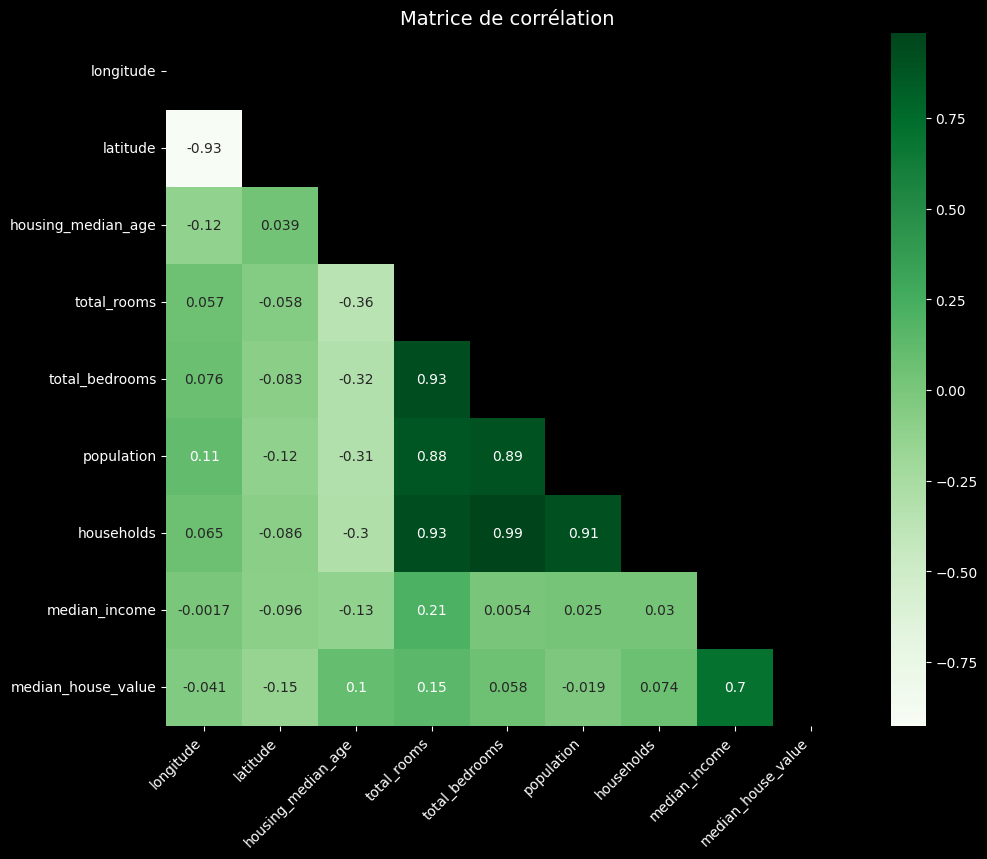

In [17]:
corr = df.select_dtypes(include='number').corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, annot=True, ax=ax,cmap="Greens")
ax.set_title("Matrice de corr√©lation", fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()

La matrice de corr√©lation montre les relations lin√©aires entre les diff√©rentes variables num√©riques :

- **Corr√©lation positive √©lev√©e :**
    - `total_rooms`, `total_bedrooms`, `population` et `households` sont fortement corr√©l√©s positivement entre eux. Cela est logique car ces variables sont toutes li√©es √† la taille et √† la densit√© des districts.
    - `median_income` a une corr√©lation positive mod√©r√©e avec `median_house_value` (0.70). Cela sugg√®re que les districts avec des revenus m√©dians plus √©lev√©s ont tendance √† avoir des valeurs m√©dianes de maisons plus √©lev√©es.

- **Corr√©lation n√©gative √©lev√©e :**
    - `longitude` et `latitude` sont fortement corr√©l√©s n√©gativement (-0.93), ce qui est attendu car ils repr√©sentent des coordonn√©es g√©ographiques et se d√©placent g√©n√©ralement dans des directions oppos√©es en Californie.

- **Corr√©lation faible ou nulle :**
    - `longitude` et `latitude` ont des corr√©lations faibles avec `median_house_value`.
    - `total_bedrooms` a une corr√©lation positive faible avec `median_house_value` (0.058).
    - `population` a une corr√©lation n√©gative faible avec `median_house_value` (-0.019).
    - `households` a une corr√©lation positive faible avec `median_house_value` (0.073).

- **Autres corr√©lations :**
    - `housing_median_age` a une faible corr√©lation positive avec `median_house_value` (0.10).
    - `total_rooms` a une faible corr√©lation positive avec `median_house_value` (0.15).

En r√©sum√©, le revenu m√©dian (`median_income`) est la variable num√©rique la plus fortement corr√©l√©e positivement avec la valeur m√©diane des maisons (`median_house_value`). Les variables li√©es √† la taille et √† la densit√© (`total_rooms`, `total_bedrooms`, `population`, `households`) sont fortement corr√©l√©es entre elles mais n'ont qu'une faible corr√©lation avec la valeur m√©diane des maisons individuellement.

Median income vs median house value

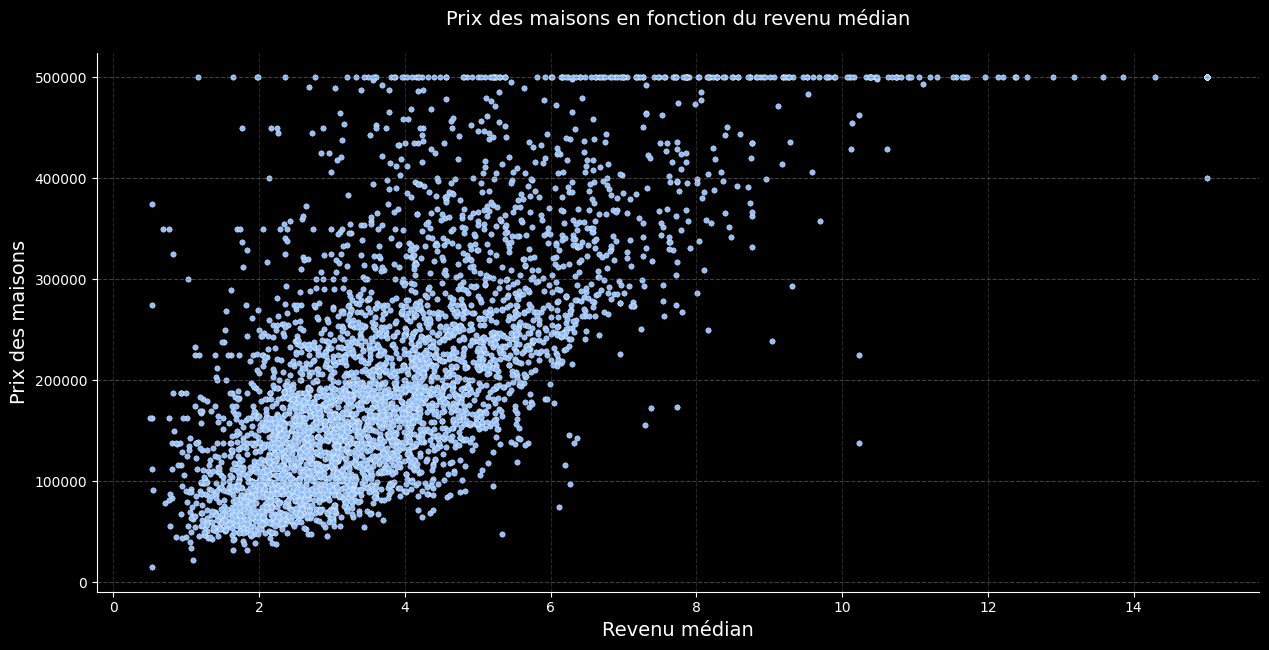

In [18]:
fig , axes = plt.subplots(figsize=(15,7))
sns.scatterplot(data = df,
                y = "median_house_value",
                x="median_income",
                color ="#8EBEFF",
                # edgecolor="red",
                s=15)
for spines_vals ,spines in axes.spines.items():
  if spines_vals in ['top', 'right']:
      spines.set_visible(False)

axes.xaxis.grid(ls="--", alpha=0.3, color="gray")
axes.yaxis.grid(ls="--", alpha=0.5, color="gray")
axes.set_title("Prix des maisons en fonction du revenu m√©dian", fontsize=14, pad=20)
axes.set_xlabel("Revenu m√©dian", fontsize=14)
axes.set_ylabel("Prix des maisons", fontsize=14)
plt.show()

Ce nuage de points illustre la relation entre le **revenu m√©dian (`median_income`)** et la **valeur m√©diane des maisons (`median_house_value`)** dans les diff√©rents districts. Plusieurs observations ressortent :

* **Corr√©lation positive :** On constate une tendance claire : plus le revenu m√©dian est √©lev√©, plus la valeur m√©diane des maisons augmente. Cette relation positive confirme ce que sugg√©rait la matrice de corr√©lation.

* **Forme de la relation :** La relation appara√Æt globalement **lin√©aire**, mais avec une dispersion notable des points, ce qui indique que d‚Äôautres facteurs interviennent √©galement dans la d√©termination des prix des maisons.

* **Plafonnement √† 500 000 \$ :** Une ligne horizontale dense se forme autour de 500 000 \$, illustrant l‚Äôeffet de **censure de la variable `median_house_value`**. Toutes les maisons dont la valeur m√©diane d√©passe ce seuil sont enregistr√©es √† cette valeur maximale, ce qui masque la v√©ritable distribution des maisons les plus ch√®res.

* **Concentration pour les revenus faibles :** On observe que de nombreux points se concentrent sur les revenus m√©dians plus bas, sugg√©rant que l‚Äôensemble de donn√©es contient davantage de districts √† revenu m√©dian faible.




## Pr√©parations des donn√©es

### Nettoyage des donn√©es

In [19]:
# X = strat_train_set.drop("median_house_value", axis=1)
# y = strat_train_set["median_house_value"].copy()

In [79]:
from sklearn.impute import SimpleImputer
X_train = strat_train_set.drop("median_house_value", axis=1)
y_train = strat_train_set["median_house_value"].copy()
housing = X_train.copy()
housing_labels = y_train.copy()


### Valeurs manquantes

In [22]:
# imputer = SimpleImputer(strategy="median")
# X_num = X_train.select_dtypes(include='number')
# imputer.fit(X_num)
# X= imputer.transform(X_num)
# X = pd.DataFrame(X, columns=X_num.columns, index=X_num.index)


In [23]:
df_cat = X_train.select_dtypes(include='object')
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
df_cat_1hot = cat_encoder.fit_transform(df_cat)
df_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [24]:
# cat_encoder.categories_
# cat_encoder.feature_names_in_
# cat_encoder.get_feature_names_out()

In [25]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
# # scaler.get_feature_names_out()
# # X_scaled=pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

In [26]:
# from sklearn.preprocessing import FunctionTransformer
# log_transformer = FunctionTransformer(np.log ,inverse_func = np.exp )
# log_pop = log_transformer.fit_transform(X[["population"]])
# # log_pop = pd.DataFrame(log_pop, columns=["log_population"], index=X.index)
# pd.concat([X['population'],log_transformer.inverse_transform(log_pop),log_pop ],axis=1)

In [27]:
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, n_init=10,
                              random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import make_column_selector
from sklearn.metrics.pairwise import rbf_kernel

def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # feature names out

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())
cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())

cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())
preprocessing = ColumnTransformer([
        ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
        ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
        ("people_per_house", ratio_pipeline(), ["population", "households"]),
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                               "households", "median_income"]),
        ("geo", cluster_simil, ["latitude", "longitude"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=default_num_pipeline)

In [29]:
housing_prepared = preprocessing.fit_transform(housing)
housing_prepared.shape
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Cluster 0 similarity',
       'geo__Cluster 1 similarity', 'geo__Cluster 2 similarity',
       'geo__Cluster 3 similarity', 'geo__Cluster 4 similarity',
       'geo__Cluster 5 similarity', 'geo__Cluster 6 similarity',
       'geo__Cluster 7 similarity', 'geo__Cluster 8 similarity',
       'geo__Cluster 9 similarity', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age'], dtype=object)

## Selectionner et entrainer un mod√®le de

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [31]:
lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7e9...
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7e922bb18da0>)])),
                ('linearregression', LinearRegression())])

In [66]:
housing_prediction = lin_reg.predict(X_train)
from sklearn.metrics import mean_squared_error,median_absolute_error,r2_score
lin_mse = mean_squared_error(y_train, housing_prediction)
lin_rmse = np.sqrt(lin_mse)
lin_mae = median_absolute_error(y_train, housing_prediction)
lin_r2 = r2_score(y_train, housing_prediction)
print(f"RMSE : {lin_rmse}")
# print(f"MSE : {lin_mse}")
print(f"MAE : {lin_mae}")
print(f"R2 : {lin_r2}")

RMSE : 69222.49818828993
MAE : 39756.27631068393
R2 : 0.6399927560078695


C'est mieux que rien mais il est clairement pas extraordinaire : pour la pluspart des sitrict les valeurs de `median_houssing_values` s'√©chelonnent  de  120.000\$ a 265.000\$ , c'est pourquoi une erruer de prediction (en moyenne) de 69.222\$ n'est pas satisfaisantes .
* Le mod√©le sous-ajuste les donn√© d'entrainement
* Les variables fournis sont peut √™tre pas assez descriminants ou r√©v√©latrice d'information essentielle ou peu √™tre notre mod√©le n'est juste pas assez puissantes

In [51]:
print(f"Les 5 premiers valeurs r√©elles {y_train[:5].values}")
print(f"Les 5 premiers valeurs predites {housing_prediction[:5].round(-2)}")
print(f"Les 5 premiers valeurs d'erreurs {y_train[:5].values - housing_prediction[:5].round(-2)}")

Les 5 premiers valeurs r√©elles [170700. 374200. 452100. 269100. 189900.]
Les 5 premiers valeurs predites [130500. 235100. 357900. 328800. 187700.]
Les 5 premiers valeurs d'erreurs [ 40200. 139100.  94200. -59700.   2200.]


* **RMSE = 69 222**
* **MAE = 39 756**
* **R¬≤ = 0,64**

---

### üìå 1. **RMSE (Root Mean Squared Error) : 69 222**

* Cela signifie que, en moyenne, l‚Äô√©cart quadratique entre la **valeur r√©elle** et la **valeur pr√©dite** est d‚Äôenviron **69 000 \$**.
* Plus le RMSE est faible, meilleure est la performance.
* Comme les prix m√©dians des maisons dans le dataset tournent souvent entre **100 000 \$ et 500 000 \$**, une erreur de **69k** est **assez √©lev√©e**, mais pas catastrophique pour un premier mod√®le.

---

### üìå 2. **MAE (Mean Absolute Error) : 39 756**

* Ici, en moyenne absolue, ton mod√®le se trompe d‚Äôenviron **40 000 \$** par maison.
* Le MAE est moins sensible aux grosses erreurs que le RMSE, donc il donne une meilleure id√©e de l‚Äôerreur typique.
* Exemple : si une maison vaut 200 000 \$, le mod√®le peut pr√©dire en moyenne autour de **160 000 \$ ou 240 000 \$**.

---

### üìå 3. **R¬≤ (Coefficient of Determination) : 0,64**

* Le R¬≤ mesure la proportion de la variance expliqu√©e par ton mod√®le.
* Ici, **64 % de la variabilit√© des prix est expliqu√©e par ton mod√®le**.
* C‚Äôest **un score correct** pour un probl√®me de r√©gression avec des donn√©es r√©elles (pas parfait, mais loin d‚Äô√™tre mauvais).
* Cela signifie aussi que **36 % des variations restent inexpliqu√©es**, peut-√™tre √† cause de variables manquantes (ex. qualit√© de la maison, √©quipements, proximit√© des transports, etc.) ou d‚Äôun mod√®le trop simple.

---

### ‚úÖ Conclusion

Ton mod√®le a une **performance correcte** : il explique une bonne partie de la variance (R¬≤ = 0,64), mais les erreurs restent √©lev√©es (MAE ‚âà 40k, RMSE ‚âà 69k).

üëâ En pratique, cela veut dire que ton mod√®le peut donner une **tendance g√©n√©rale des prix** en Californie, mais pas une estimation tr√®s pr√©cise maison par maison.



In [56]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7e9...
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7e922bb18da0>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [58]:
tree_prediction = tree_reg.predict(X_train)
tree_mse = mean_squared_error(y_train, tree_prediction)
tree_rmse = np.sqrt(tree_mse)
tree_mae = median_absolute_error(y_train, tree_prediction)
tree_r2 = r2_score(y_train, tree_prediction)
print(f"RMSE : {tree_rmse}")
print(f"MAE : {tree_mae}")
print(f"R2 : {tree_r2}")

RMSE : 0.0
MAE : 0.0
R2 : 1.0


Ceci n'est pas la bonne m√©thode

In [64]:
from sklearn.model_selection import cross_val_score
tree_rmse = -cross_val_score(tree_reg, housing, y_train,
                         scoring="neg_root_mean_squared_error", cv=10)

pd.Series(tree_rmse).describe()

count       10.000000
mean     67187.112262
std       2425.609570
min      64314.626731
25%      65055.685523
50%      67437.886916
75%      67845.514264
max      71845.866626
dtype: float64

In [67]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = make_pipeline(preprocessing, RandomForestRegressor(n_estimators=100, random_state=42))
forest_reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7e9...
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7e922bb18da0>)])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [69]:
RF_rmse = -cross_val_score(forest_reg , X_train , y_train ,scoring="neg_root_mean_squared_error" , cv=10)


In [70]:
pd.Series(RF_rmse).describe()

count       10.000000
mean     47278.617676
std       1390.279885
min      44436.192341
25%      46910.723158
50%      47446.179874
75%      47973.683738
max      49054.355994
dtype: float64

In [72]:
from sklearn.svm import SVR
svm_reg = make_pipeline(preprocessing, SVR(kernel="linear"))
svm_reg.fit(X_train, y_train)
svm_rmse = - cross_val_score(svm_reg, housing, y_train,
                         scoring="neg_root_mean_squared_error", cv=10)
pd.Series(svm_rmse).describe()

count        10.000000
mean     111739.442794
std        2537.452146
min      108061.955044
25%      110841.737448
50%      110916.526019
75%      112224.375382
max      117871.190210
dtype: float64

In [71]:
from sklearn.svm import SVR
svm_reg = make_pipeline(preprocessing, SVR(kernel="rbf"))
svm_reg.fit(X_train, y_train)
svm_rmse = - cross_val_score(svm_reg, housing, y_train,
                         scoring="neg_root_mean_squared_error", cv=10)
pd.Series(svm_rmse).describe()

count        10.000000
mean     118094.812490
std        2513.311814
min      114117.676447
25%      117042.113425
50%      117562.058375
75%      118640.703975
max      124014.668354
dtype: float64

### Recherche par quadrillage

In [80]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])
param_grid = [
    {'preprocessing__geo__n_clusters': [5, 8, 10],
     'random_forest__max_features': [4, 6, 8]},
    {'preprocessing__geo__n_clusters': [10, 15],
     'random_forest__max_features': [6, 8, 10]},
]
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')
grid_search.fit(housing, housing_labels)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<f...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7e922bb18da0>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'preprocessing__geo__n_clusters': [5, 8, 10],
                          'random_forest__max_features': [4, 6, 8]},
                         {'preprocessing__geo__n_clusters': [10, 15],
                          'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

In [93]:
grid_search.best_params_

{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 6}

### Recherche al√©atoire



## üîé 1. Contexte

Quand on construit un mod√®le (ex. **RandomForest, XGBoost, SVM**‚Ä¶), il y a des **hyperparam√®tres** (nombre d‚Äôarbres, profondeur max, taux d‚Äôapprentissage, etc.) qu‚Äôon doit r√©gler.
‚Üí Leur choix influence fortement les performances.

---

## ‚öôÔ∏è 2. Deux grandes m√©thodes de recherche

* **GridSearchCV** : teste **toutes les combinaisons possibles** dans une grille d√©finie ‚Üí pr√©cis, mais co√ªteux (explosion combinatoire).
* **RandomizedSearchCV** : tire **au hasard** un certain nombre de combinaisons d‚Äôhyperparam√®tres dans un espace d√©fini ‚Üí plus rapide, souvent presque aussi efficace.

---

## üß™ 3. Comment fonctionne RandomizedSearchCV ?

1. Tu d√©finis :

   * les **param√®tres** et leur **distribution** (plage de valeurs ou liste possible),
   * le **nombre d‚Äôit√©rations** (`n_iter`) = combien de combinaisons tester.
2. sklearn choisit **au hasard** des combinaisons.
3. Chaque combinaison est √©valu√©e par **validation crois√©e**.
4. Le mod√®le avec les meilleurs r√©sultats est retenu.

---

## üìä 5. Avantages et inconv√©nients

‚úÖ **Avantages :**

* Plus rapide que GridSearch (pas besoin de tester tout l‚Äôespace).
* Peut trouver des bons hyperparam√®tres m√™me dans un espace √©norme.
* Flexible (on peut mettre des distributions continues, ex. `uniform(0.001, 0.1)` pour un learning rate).

‚ùå **Inconv√©nients :**

* R√©sultat d√©pend du hasard (mais on peut fixer `random_state`).
* Moins exhaustif que GridSearch.
* N√©cessite de bien d√©finir les plages de recherche (sinon on passe √† c√¥t√© du bon r√©glage).

---

üëâ En r√©sum√© :
**RandomizedSearchCV explore au hasard un sous-ensemble d‚Äôhyperparam√®tres et garde la meilleure combinaison trouv√©e.**
C‚Äôest un bon compromis entre performance et co√ªt de calcul, surtout quand l‚Äôespace des param√®tres est grand.




In [97]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {'preprocessing__geo__n_clusters':randint(low=3,high=50),
                  'random_forest__max_features':randint(low=2 , high=20)}

rnd_search = RandomizedSearchCV(full_pipeline , param_distributions= param_distribs, n_iter=10 , cv=3 , scoring='neg_root_mean_squared_error' , random_state=42,n_jobs=-1)
rnd_search.fit(housing, housing_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_...
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'preprocessing__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e922656eae0>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e922656f2c0>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [100]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
# configure the search
search = HalvingRandomSearchCV(full_pipeline, param_distribs, n_candidates=10, factor=2, min_resources=100, max_resources=500, n_jobs=-1, scoring='neg_root_mean_squared_error', cv=5, random_state=42)

# execute search
result = search.fit(X_train, y_train)

### Analysons le mod√©le et leurs erreurs

In [101]:
rnd_search.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7e922ae...
                                                  ClusterSimilarity(n_clusters=45,
                                                                    random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7e92265590a0>)])),
                ('random_forest',
                 RandomForestRegressor(max_features=9, random_state=42))])

In [104]:
# rnd_search.best_params_
# rnd_search.best_score_ , search.best_score_

(np.float64(-42765.342425979004), np.float64(-61978.01674852887))

In [119]:
final_model = rnd_search.best_estimator_
feature_importances = final_model["random_forest"].feature_importances_
sorted(zip(feature_importances,final_model["preprocessing"].get_feature_names_out() ),reverse=True)
feature_importances = pd.DataFrame(feature_importances,index=final_model["preprocessing"].get_feature_names_out(),columns=["importance"]).sort_values(by="importance",ascending=False)

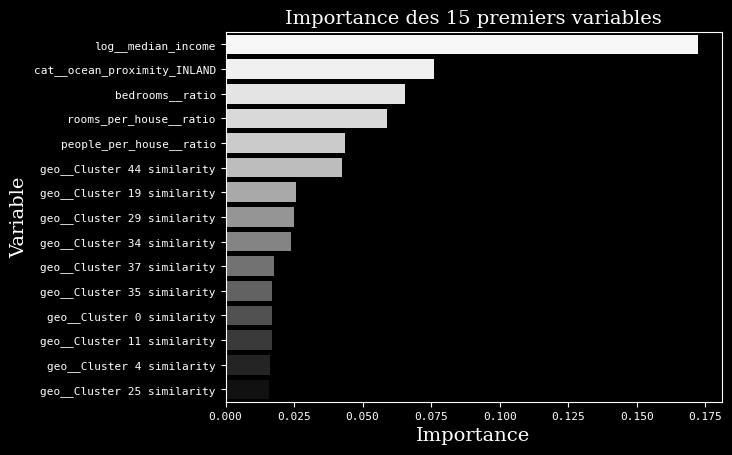

In [142]:
sns.barplot(data=feature_importances.iloc[:15,:],y=feature_importances.iloc[:15,:].index,x="importance",palette="Grays")
plt.title("Importance des 15 premiers variables",fontsize=14,fontfamily="serif")
plt.xlabel("Importance",fontsize=14,fontfamily="serif")
plt.ylabel("Variable",fontsize=14 , fontfamily="serif")
plt.yticks(fontsize=8,fontfamily="monospace")
plt.xticks(fontsize=8,fontfamily="monospace")
plt.show()

### Evaluations sur le jeu de test

In [143]:
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
#

In [145]:
final_predicition = final_model.predict(X_test)
final_mse = mean_squared_error(y_test, final_predicition)
final_rmse = np.sqrt(final_mse)
final_mae = median_absolute_error(y_test, final_predicition)
final_r2 = r2_score(y_test, final_predicition)
print(f"RMSE : {final_rmse}")
print(f"MAE : {final_mae}")
print(f"R2 : {final_r2}")


RMSE : 39177.438996176425
MAE : 15334.5
R2 : 0.8849102294785527


In [146]:
from scipy import stats
confidence = 95
squared_erros = (final_predicition - y_test)**2
np.sqrt(stats.t.interval(confidence/100, len(squared_erros)-1,
                         loc=squared_erros.mean(),
                         scale=stats.sem(squared_erros)))

array([37198.43807531, 41061.16970272])

In [147]:
# sauvegarde du model
import joblib
joblib.dump(final_model, "my_california_housing_model.pkl")

['my_california_housing_model.pkl']

In [148]:
from google.colab import drive; drive.mount('/content/drive')

Mounted at /content/drive


In [153]:
!cp /content/my_california_housing_model.pkl /content/drive/Mon drive/Monporfolio/projet/model/

cp: target 'drive/Monporfolio/projet/model/' is not a directory


In [154]:
# Create the target directory in Google Drive if it doesn't exist
!mkdir -p "/content/drive/My Drive/Monporfolio/projet/model/"

# Copy the model to the target directory
!cp "/content/my_california_housing_model.pkl" "/content/drive/My Drive/Monporfolio/projet/model/"